In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy import newaxis
%matplotlib inline
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
pd.set_option("display.max_columns",500)

In [6]:
path = 'D:/BTP Project/Data_low_freq_house_1/Data_csv/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.dat' in file:
            files.append(file)
names_col = ["timestamp", "value"]

df0 =  pd.read_csv(path+files[0],names=names_col,header=0)
print(files[0],"is done")
for i in range(1,len(files)):
    split_name = files[i].split('.')
    df =  pd.read_csv(path+files[i],names=names_col,header=0)
    df0 = pd.merge(df,df0,on='timestamp',suffixes=('','_'+split_name[0])) #rsuffix=files[i])#suffixes=('',files[i]))
    print(files[i], 'is done')

merged_csvs = df0.to_csv(path+"all_appliances_merged.csv")
print('completed')


bathroom_gfi.dat.csv is done
dishwasher.dat.csv is done
electric_heat.dat.csv is done
kitchen_outlets_1.dat.csv is done
kitchen_outlets_2.dat.csv is done
kitchen_outlets_3.dat.csv is done
kitchen_outlets_4.dat.csv is done
lighting_1.dat.csv is done
lighting_2.dat.csv is done
lighting_3.dat.csv is done
microwave.dat.csv is done
oven_1.dat.csv is done
oven_2.dat.csv is done
refrigerator.dat.csv is done
stove.dat.csv is done
washer_dryer_1.dat.csv is done
washer_dryer_2.dat.csv is done
washer_dryer_3.dat.csv is done
completed


In [7]:
merged_csvs = pd.read_csv(path+"all_appliances_merged.csv",index_col=0)

In [8]:
merged_csvs.head()

,timestamp,value,value_washer_dryer_3,value_washer_dryer_2,value_washer_dryer_1,value_stove,value_refrigerator,value_oven_2,value_oven_1,value_microwave,value_lighting_3,value_lighting_2,value_lighting_1,value_kitchen_outlets_4,value_kitchen_outlets_3,value_kitchen_outlets_2,value_kitchen_outlets_1,value_electric_heat,value_dishwasher
0,1303132933,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0
1,1303132936,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0
2,1303132940,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,22.0,34.0,0.0,0.0,1.0
3,1303132943,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,1.0,21.0,35.0,0.0,1.0,1.0
4,1303132946,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0


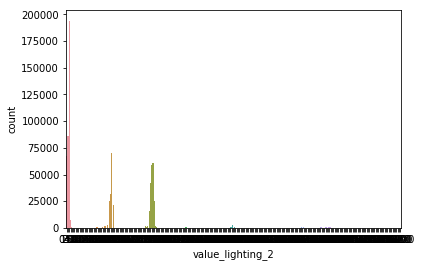

In [9]:
sns.countplot(merged_csvs['value_lighting_2']);

In [10]:
# check for NaN values

merged_csvs.isnull().sum()

timestamp                  0
value                      0
value_washer_dryer_3       0
value_washer_dryer_2       0
value_washer_dryer_1       0
value_stove                0
value_refrigerator         0
value_oven_2               0
value_oven_1               0
value_microwave            0
value_lighting_3           0
value_lighting_2           0
value_lighting_1           0
value_kitchen_outlets_4    0
value_kitchen_outlets_3    0
value_kitchen_outlets_2    0
value_kitchen_outlets_1    0
value_electric_heat        0
value_dishwasher           0
dtype: int64

In [11]:
# To check what kind of variables are we dealing with - float (continuous) and object(categorial)

dtype_df = merged_csvs.dtypes.reset_index()
dtype_df.columns = ["Names", "Column Type"]
dtype_df

,Names,Column Type
0,timestamp,int64
1,value,float64
2,value_washer_dryer_3,float64
3,value_washer_dryer_2,float64
4,value_washer_dryer_1,float64
5,value_stove,float64
6,value_refrigerator,float64
7,value_oven_2,float64
8,value_oven_1,float64
9,value_microwave,float64


In [12]:
# Let's work on numerical dataframe
df_num = merged_csvs.select_dtypes(include = ['float64'])
df_num.head()

,value,value_washer_dryer_3,value_washer_dryer_2,value_washer_dryer_1,value_stove,value_refrigerator,value_oven_2,value_oven_1,value_microwave,value_lighting_3,value_lighting_2,value_lighting_1,value_kitchen_outlets_4,value_kitchen_outlets_3,value_kitchen_outlets_2,value_kitchen_outlets_1,value_electric_heat,value_dishwasher
0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,22.0,34.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,1.0,21.0,35.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0


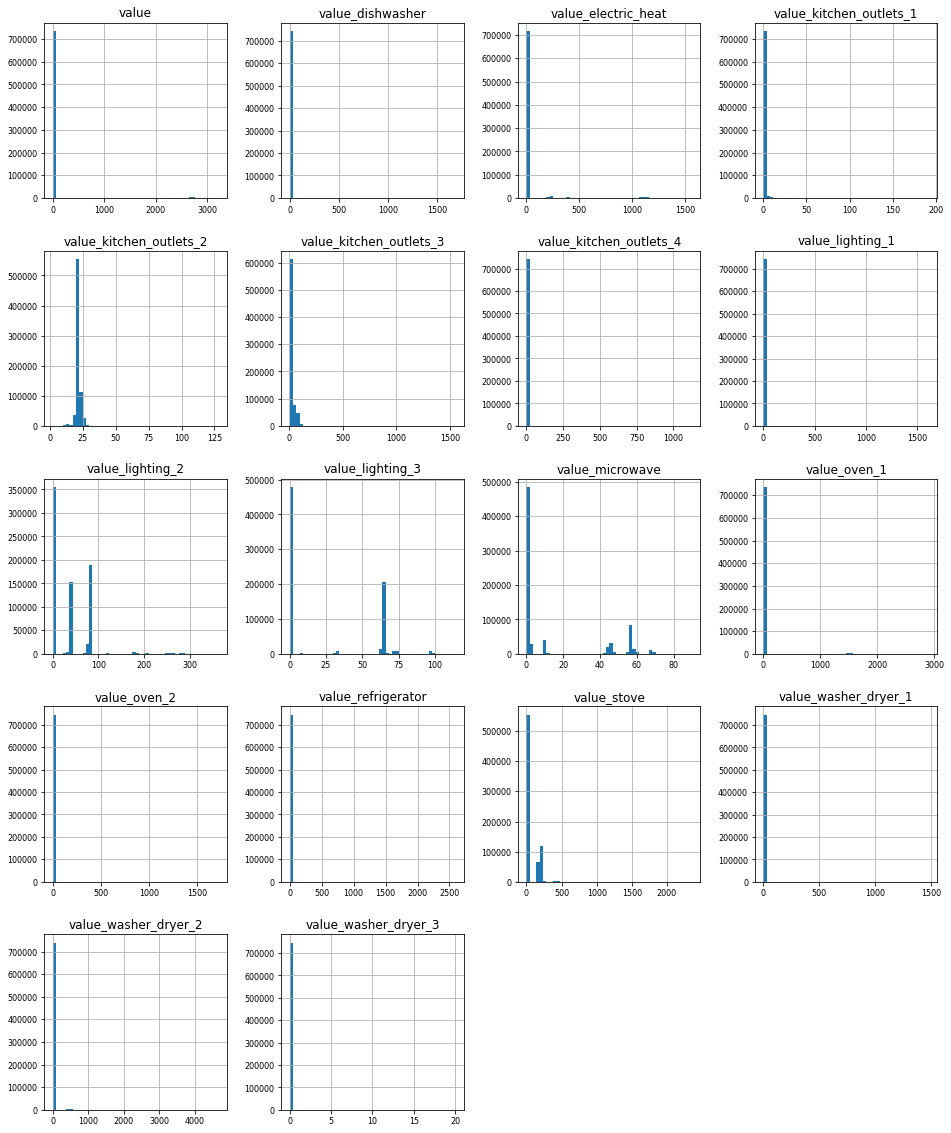

In [15]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # avoid having the matplotlib verbose informations

In [18]:
import datetime
utc_datetime = datetime.datetime.utcnow()
# utc_datetime.strftime("%Y-%m-%d %H:%M:%S")
print(utc_datetime)

2019-08-16 20:17:36.333971


In [31]:
merged_csvs['Date'] = df.apply(lambda row: '{}-{}-{} {}:{}:{}'.format(*gmtime(row.timestamp)), axis = 1) 

In [32]:
merged_csvs.head()

,timestamp,value,value_washer_dryer_3,value_washer_dryer_2,value_washer_dryer_1,value_stove,value_refrigerator,value_oven_2,value_oven_1,value_microwave,value_lighting_3,value_lighting_2,value_lighting_1,value_kitchen_outlets_4,value_kitchen_outlets_3,value_kitchen_outlets_2,value_kitchen_outlets_1,value_electric_heat,value_dishwasher,Date
0,1303132933,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0,2011-4-18 13:22:13
1,1303132936,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0,2011-4-18 13:22:16
2,1303132940,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,22.0,34.0,0.0,0.0,1.0,2011-4-18 13:22:20
3,1303132943,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,1.0,21.0,35.0,0.0,1.0,1.0,2011-4-18 13:22:23
4,1303132946,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,46.0,65.0,81.0,0.0,2.0,21.0,34.0,0.0,0.0,1.0,2011-4-18 13:22:26


In [33]:
merged_csvs.tail()

,timestamp,value,value_washer_dryer_3,value_washer_dryer_2,value_washer_dryer_1,value_stove,value_refrigerator,value_oven_2,value_oven_1,value_microwave,value_lighting_3,value_lighting_2,value_lighting_1,value_kitchen_outlets_4,value_kitchen_outlets_3,value_kitchen_outlets_2,value_kitchen_outlets_1,value_electric_heat,value_dishwasher,Date
745873,1306266980,0.0,0.0,0.0,0.0,186.0,0.0,0.0,4.0,1.0,0.0,2.0,0.0,1.0,20.0,26.0,0.0,1.0,1.0,2011-5-24 19:56:20
745874,1306266983,0.0,0.0,0.0,0.0,187.0,0.0,0.0,4.0,1.0,0.0,2.0,0.0,1.0,20.0,24.0,0.0,0.0,1.0,2011-5-24 19:56:23
745875,1306266987,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4.0,1.0,0.0,2.0,0.0,1.0,20.0,24.0,0.0,0.0,1.0,2011-5-24 19:56:27
745876,1306266990,0.0,0.0,0.0,0.0,189.0,0.0,0.0,4.0,1.0,0.0,2.0,0.0,1.0,20.0,24.0,0.0,0.0,1.0,2011-5-24 19:56:30
745877,1306266994,0.0,0.0,0.0,0.0,186.0,0.0,0.0,4.0,1.0,0.0,2.0,0.0,1.0,20.0,26.0,0.0,0.0,1.0,2011-5-24 19:56:34
